In [ ]:
# 🎭 Simple 2D Demo - Интерактивная Демонстрация Клеточной Нейронной Сети

## 🎯 Цель
Наглядная демонстрация концепции 3D клеточной нейронной сети на простом 2D примере. 

## 🧬 Биологическая Аналогия
Представьте плоский кусочек нервной ткани:
- **Каждая клетка** = нейрон
- **Все нейроны одинаковые** (используют один прототип)
- **Каждый получает сигналы** от соседей
- **Обрабатывает их и передает** дальше
- **Все работают синхронно**

## 📋 Что Мы Увидим
1. **Распространение волны** - сигнал с одной стороны решетки
2. **Радиальный импульс** - распространение от центра кругами  
3. **Интерференция волн** - взаимодействие двух сигналов
4. **Интерактивные эксперименты** - возможность настраивать параметры

---

**🚀 Запустите ячейки по порядку для полной демонстрации!**


In [2]:
# 📦 Импорт Модулей и Настройка
import sys
import os
from pathlib import Path
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation
from matplotlib.colors import LinearSegmentedColormap
import torch
import torch.nn as nn
from IPython.display import display, HTML, clear_output
import ipywidgets as widgets
from ipywidgets import interact, interactive, fixed, interact_manual

# Добавляем путь к проекту
project_root = Path().resolve().parent.parent
sys.path.insert(0, str(project_root))

print(f"🔧 Проект: {project_root}")

# Импортируем наш модуль
try:
    from simple_2d_demo import Simple2DLattice, PatternGenerator, Demo2DVisualizer
    print("✅ Модули Simple 2D Demo загружены успешно!")
except ImportError as e:
    print(f"❌ Ошибка импорта: {e}")
    print("💡 Убедитесь, что запускаете из правильной директории")

# Настройки для красивых графиков
plt.style.use('dark_background') 
%matplotlib inline

print("🎨 Jupyter Notebook готов к демонстрации!")


🔧 Проект: C:\Users\n0n4a\projects\AA
✅ Модули загружены успешно!
✅ Модули Simple 2D Demo загружены успешно!
🎨 Jupyter Notebook готов к демонстрации!


In [ ]:
## 🧪 Быстрая Проверка Работоспособности

Сначала убедимся, что все работает правильно:


In [3]:
# Быстрый тест базовой функциональности
print("🧪 БЫСТРЫЙ ТЕСТ")
print("=" * 30)

# Создаем маленькую решетку
lattice = Simple2DLattice(width=5, height=5)
print(f"✅ Создана решетка {lattice.width}x{lattice.height}")
print(f"   Состояние клеток: {lattice.states.shape}")

# Создаем простой паттерн
pattern = PatternGenerator.wave_source(5, 5, side='left', intensity=2.0)
print(f"✅ Создан паттерн: {pattern.shape}")

# Один шаг симуляции
lattice.step(external_input=pattern)
activity = lattice.get_activity_map()
print(f"✅ Шаг выполнен: максимальная активность = {activity.max():.3f}")

# Создаем визуализатор
visualizer = Demo2DVisualizer(lattice)
print("✅ Визуализатор готов")

print("\n🎉 Все системы работают! Переходим к демонстрациям...")


🧪 БЫСТРЫЙ ТЕСТ
✅ Создана 2D решетка 5x5 с общим прототипом клетки
✅ Создана решетка 5x5
   Состояние клеток: torch.Size([5, 5, 4])
✅ Создан паттерн: torch.Size([5, 5, 1])
✅ Шаг выполнен: максимальная активность = 0.741
✅ Визуализатор готов

🎉 Все системы работают! Переходим к демонстрациям...


In [ ]:
## 🌊 Демонстрация #1: Распространение Волны

**Концепция**: Сигнал подается с одной стороны решетки и распространяется как волна.

**Биологическая аналогия**: Нервный импульс проходит по ткани от точки стимуляции.


🌊 Запуск волны: сторона=left, интенсивность=2.0
✅ Создана 2D решетка 15x10 с общим прототипом клетки


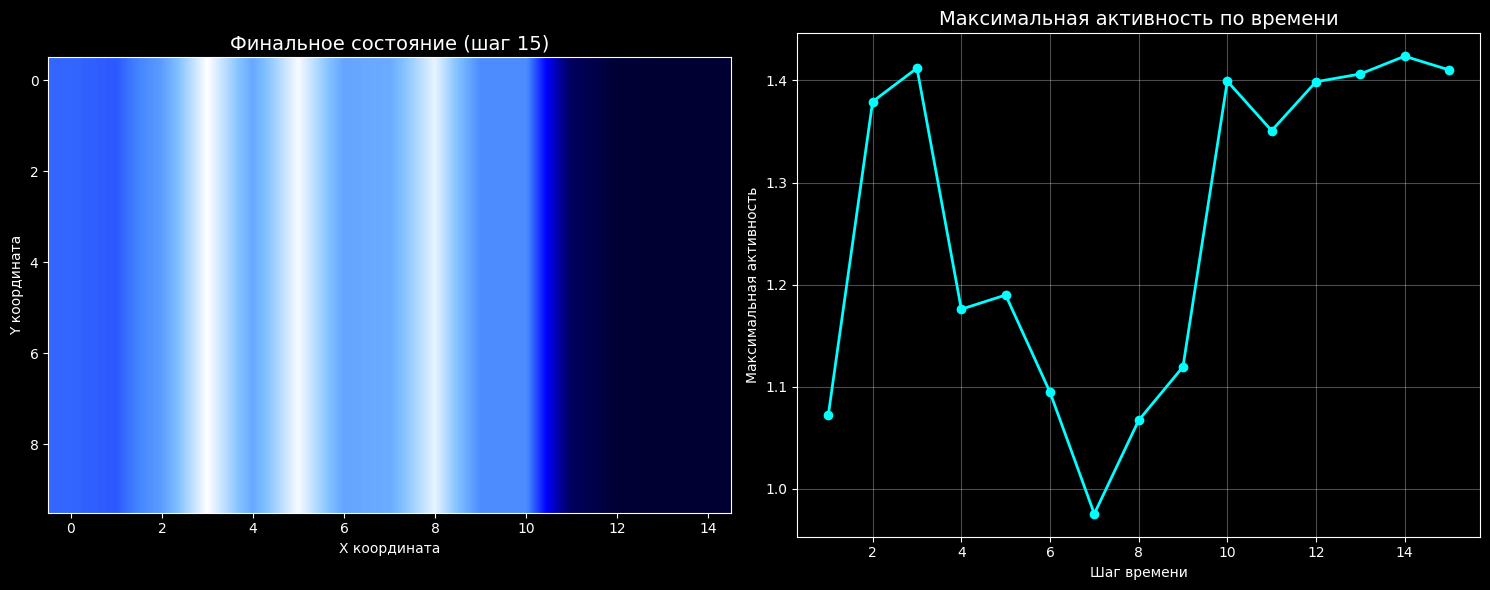

📊 Результаты:
   Максимальная активность: 1.424
   Финальная активность: 1.410
   Активных клеток в конце: 120


In [4]:
# Функция для создания интерактивной демонстрации волны
def wave_demo_interactive(width=15, height=10, intensity=2.0, side='left', steps=15):
    """Интерактивная демонстрация распространения волны"""
    
    print(f"🌊 Запуск волны: сторона={side}, интенсивность={intensity}")
    
    # Создаем решетку
    lattice = Simple2DLattice(width=width, height=height)
    visualizer = Demo2DVisualizer(lattice)
    
    # Создаем волновой источник
    wave_input = PatternGenerator.wave_source(width, height, side=side, intensity=intensity)
    
    # Создаем фигуру для анимации
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))
    
    # Цветовая схема
    colors = ['#000033', '#000080', '#0000FF', '#4080FF', '#80C0FF', '#FFFFFF']
    cmap = LinearSegmentedColormap.from_list('neural', colors)
    
    # Запускаем симуляцию и собираем данные
    activities = []
    max_activities = []
    
    for step in range(steps):
        if step < 3:  # Подаем вход только первые 3 шага
            lattice.step(external_input=wave_input)
        else:
            lattice.step()
        
        activity = lattice.get_activity_map()
        activities.append(activity.copy())
        max_activities.append(activity.max())
    
    # Визуализация финального состояния
    ax1.imshow(activities[-1], cmap=cmap, interpolation='bilinear')
    ax1.set_title(f'Финальное состояние (шаг {steps})', fontsize=14, color='white')
    ax1.set_xlabel('X координата', color='white')
    ax1.set_ylabel('Y координата', color='white')
    
    # График изменения максимальной активности
    ax2.plot(range(1, steps+1), max_activities, 'o-', color='cyan', linewidth=2, markersize=6)
    ax2.set_title('Максимальная активность по времени', fontsize=14, color='white')
    ax2.set_xlabel('Шаг времени', color='white')
    ax2.set_ylabel('Максимальная активность', color='white')
    ax2.grid(True, alpha=0.3)
    ax2.tick_params(colors='white')
    
    plt.tight_layout()
    plt.show()
    
    print(f"📊 Результаты:")
    print(f"   Максимальная активность: {max(max_activities):.3f}")
    print(f"   Финальная активность: {max_activities[-1]:.3f}")
    print(f"   Активных клеток в конце: {(activities[-1] > 0.1).sum()}")

# Запускаем демонстрацию
wave_demo_interactive()


In [ ]:
### 🎛️ Интерактивные Эксперименты с Волной

Попробуйте изменить параметры и посмотрите, как это влияет на результат:


In [5]:
# Интерактивный виджет для экспериментов с волной
interact(wave_demo_interactive,
         width=widgets.IntSlider(value=15, min=8, max=25, step=1, description='Ширина:'),
         height=widgets.IntSlider(value=10, min=6, max=20, step=1, description='Высота:'),
         intensity=widgets.FloatSlider(value=2.0, min=0.5, max=5.0, step=0.1, description='Интенсивность:'),
         side=widgets.Dropdown(options=['left', 'right', 'top', 'bottom'], value='left', description='Сторона:'),
         steps=widgets.IntSlider(value=15, min=5, max=30, step=1, description='Шаги:'))


interactive(children=(IntSlider(value=15, description='Ширина:', max=25, min=8), IntSlider(value=10, descripti…

<function __main__.wave_demo_interactive(width=15, height=10, intensity=2.0, side='left', steps=15)>

In [ ]:
## 💥 Демонстрация #2: Радиальный Импульс

**Концепция**: Сигнал подается в центр решетки и распространяется кругами.

**Биологическая аналогия**: Возбуждение нейрона распространяется во все стороны по дендритам.


💥 Импульс: центр=(6,6), радиус=2, интенсивность=3.0
✅ Создана 2D решетка 12x12 с общим прототипом клетки


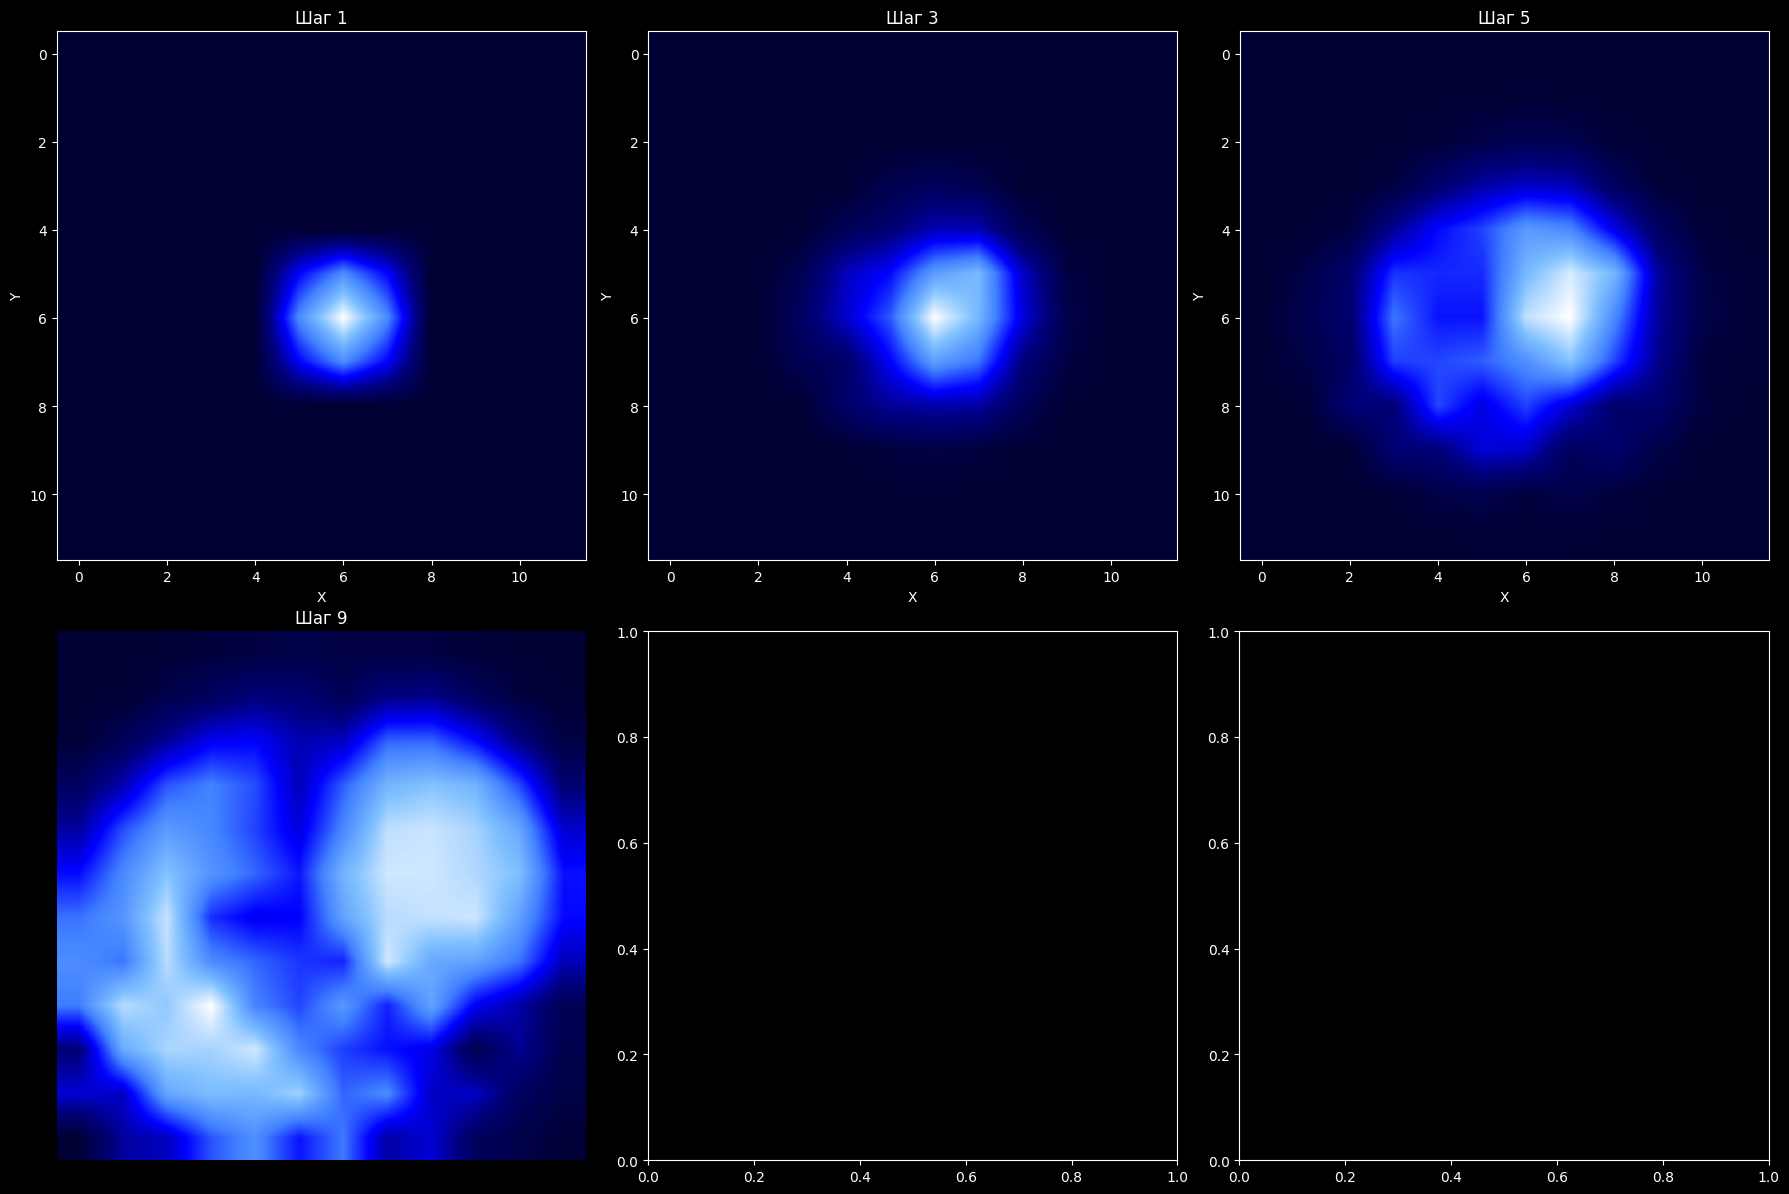

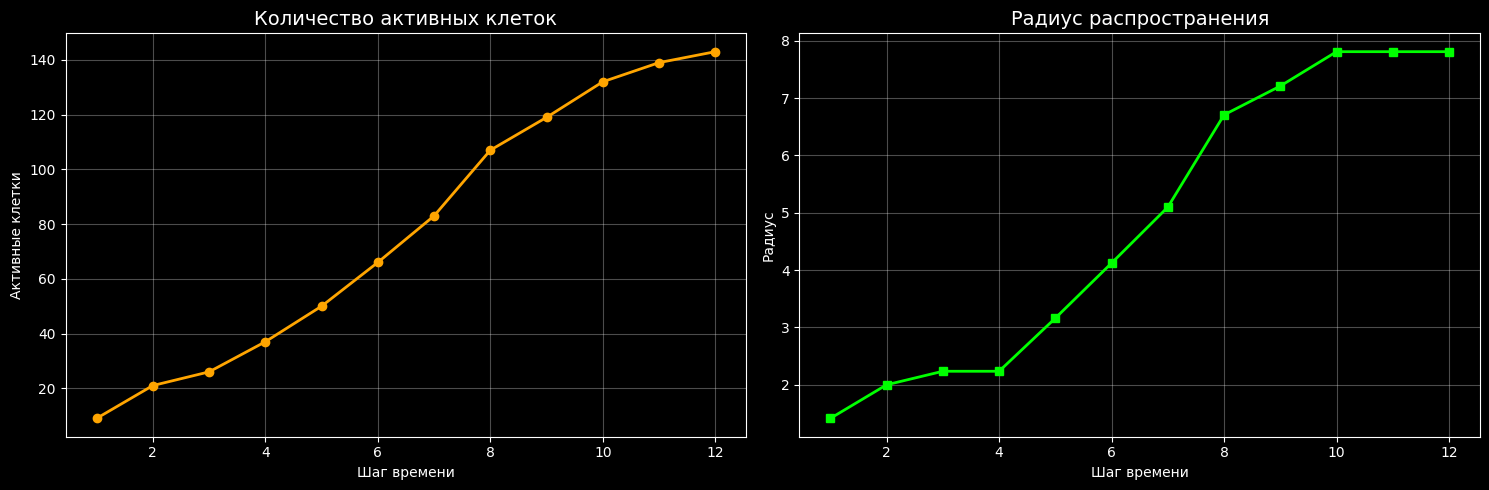

📊 Результаты:
   Максимальный радиус: 7.81
   Максимум активных клеток: 143
   Скорость распространения: 0.65 клеток/шаг


In [6]:
# Функция для радиального импульса
def pulse_demo_interactive(width=12, height=12, center_x=6, center_y=6, radius=2, intensity=3.0, steps=12):
    """Интерактивная демонстрация радиального импульса"""
    
    print(f"💥 Импульс: центр=({center_x},{center_y}), радиус={radius}, интенсивность={intensity}")
    
    # Создаем решетку
    lattice = Simple2DLattice(width=width, height=height)
    
    # Создаем импульс в центре  
    pulse_input = PatternGenerator.pulse_pattern(width, height, center_x, center_y, radius, intensity)
    
    # Создаем фигуру для визуализации
    fig, axes = plt.subplots(2, 3, figsize=(18, 12))
    
    # Цветовая схема
    colors = ['#000033', '#000080', '#0000FF', '#4080FF', '#80C0FF', '#FFFFFF']
    cmap = LinearSegmentedColormap.from_list('neural', colors)
    
    # Запускаем симуляцию и сохраняем ключевые моменты
    activities = []
    active_counts = []
    key_steps = [0, 2, 4, 8, 12]  # Ключевые шаги для отображения
    
    for step in range(steps):
        if step < 3:  # Подаем импульс только первые 3 шага
            lattice.step(external_input=pulse_input)
        else:
            lattice.step()
        
        activity = lattice.get_activity_map()
        activities.append(activity.copy())
        active_counts.append((activity > 0.1).sum())
    
    # Отображаем ключевые шаги
    for i, step_idx in enumerate(key_steps[:6]):  # Показываем до 6 кадров
        if step_idx < len(activities):
            row, col = i // 3, i % 3
            im = axes[row, col].imshow(activities[step_idx], cmap=cmap, interpolation='bilinear')
            axes[row, col].set_title(f'Шаг {step_idx + 1}', fontsize=12, color='white')
            axes[row, col].set_xlabel('X', color='white')
            axes[row, col].set_ylabel('Y', color='white')
        else:
            axes[row, col].axis('off')
    
    plt.tight_layout()
    plt.show()
    
    # График распространения
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))
    
    # График активных клеток
    ax1.plot(range(1, len(active_counts)+1), active_counts, 'o-', color='orange', linewidth=2)
    ax1.set_title('Количество активных клеток', fontsize=14, color='white')
    ax1.set_xlabel('Шаг времени', color='white')
    ax1.set_ylabel('Активные клетки', color='white')
    ax1.grid(True, alpha=0.3)
    ax1.tick_params(colors='white')
    
    # Радиус распространения
    radii = []
    for activity in activities:
        active_mask = activity > 0.3
        if active_mask.any():
            max_distance = 0
            for y in range(height):
                for x in range(width):
                    if active_mask[y, x]:
                        distance = np.sqrt((x - center_x)**2 + (y - center_y)**2)
                        max_distance = max(max_distance, distance)
            radii.append(max_distance)
        else:
            radii.append(0)
    
    ax2.plot(range(1, len(radii)+1), radii, 's-', color='lime', linewidth=2)
    ax2.set_title('Радиус распространения', fontsize=14, color='white')
    ax2.set_xlabel('Шаг времени', color='white')
    ax2.set_ylabel('Радиус', color='white')
    ax2.grid(True, alpha=0.3)
    ax2.tick_params(colors='white')
    
    plt.tight_layout()
    plt.show()
    
    print(f"📊 Результаты:")
    print(f"   Максимальный радиус: {max(radii):.2f}")
    print(f"   Максимум активных клеток: {max(active_counts)}")
    print(f"   Скорость распространения: {max(radii)/len(radii):.2f} клеток/шаг")

# Запускаем демонстрацию
pulse_demo_interactive()


In [ ]:
### 🎛️ Интерактивные Эксперименты с Импульсом


In [7]:
# Интерактивный виджет для экспериментов с импульсом
interact(pulse_demo_interactive,
         width=widgets.IntSlider(value=12, min=8, max=20, step=1, description='Ширина:'),
         height=widgets.IntSlider(value=12, min=8, max=20, step=1, description='Высота:'),
         center_x=widgets.IntSlider(value=6, min=2, max=18, step=1, description='Центр X:'),
         center_y=widgets.IntSlider(value=6, min=2, max=18, step=1, description='Центр Y:'),
         radius=widgets.IntSlider(value=2, min=1, max=5, step=1, description='Радиус:'),
         intensity=widgets.FloatSlider(value=3.0, min=1.0, max=6.0, step=0.2, description='Интенсивность:'),
         steps=widgets.IntSlider(value=12, min=8, max=20, step=1, description='Шаги:'))


interactive(children=(IntSlider(value=12, description='Ширина:', max=20, min=8), IntSlider(value=12, descripti…

<function __main__.pulse_demo_interactive(width=12, height=12, center_x=6, center_y=6, radius=2, intensity=3.0, steps=12)>

In [ ]:
## 🌊➡️⬅️🌊 Демонстрация #3: Интерференция Волн

**Концепция**: Две волны движутся навстречу друг другу и взаимодействуют.

**Биологическая аналогия**: Нервные импульсы от разных источников встречаются в ткани.


🌊 Интерференция: left (1.5) ↔ right (1.5)
✅ Создана 2D решетка 20x12 с общим прототипом клетки


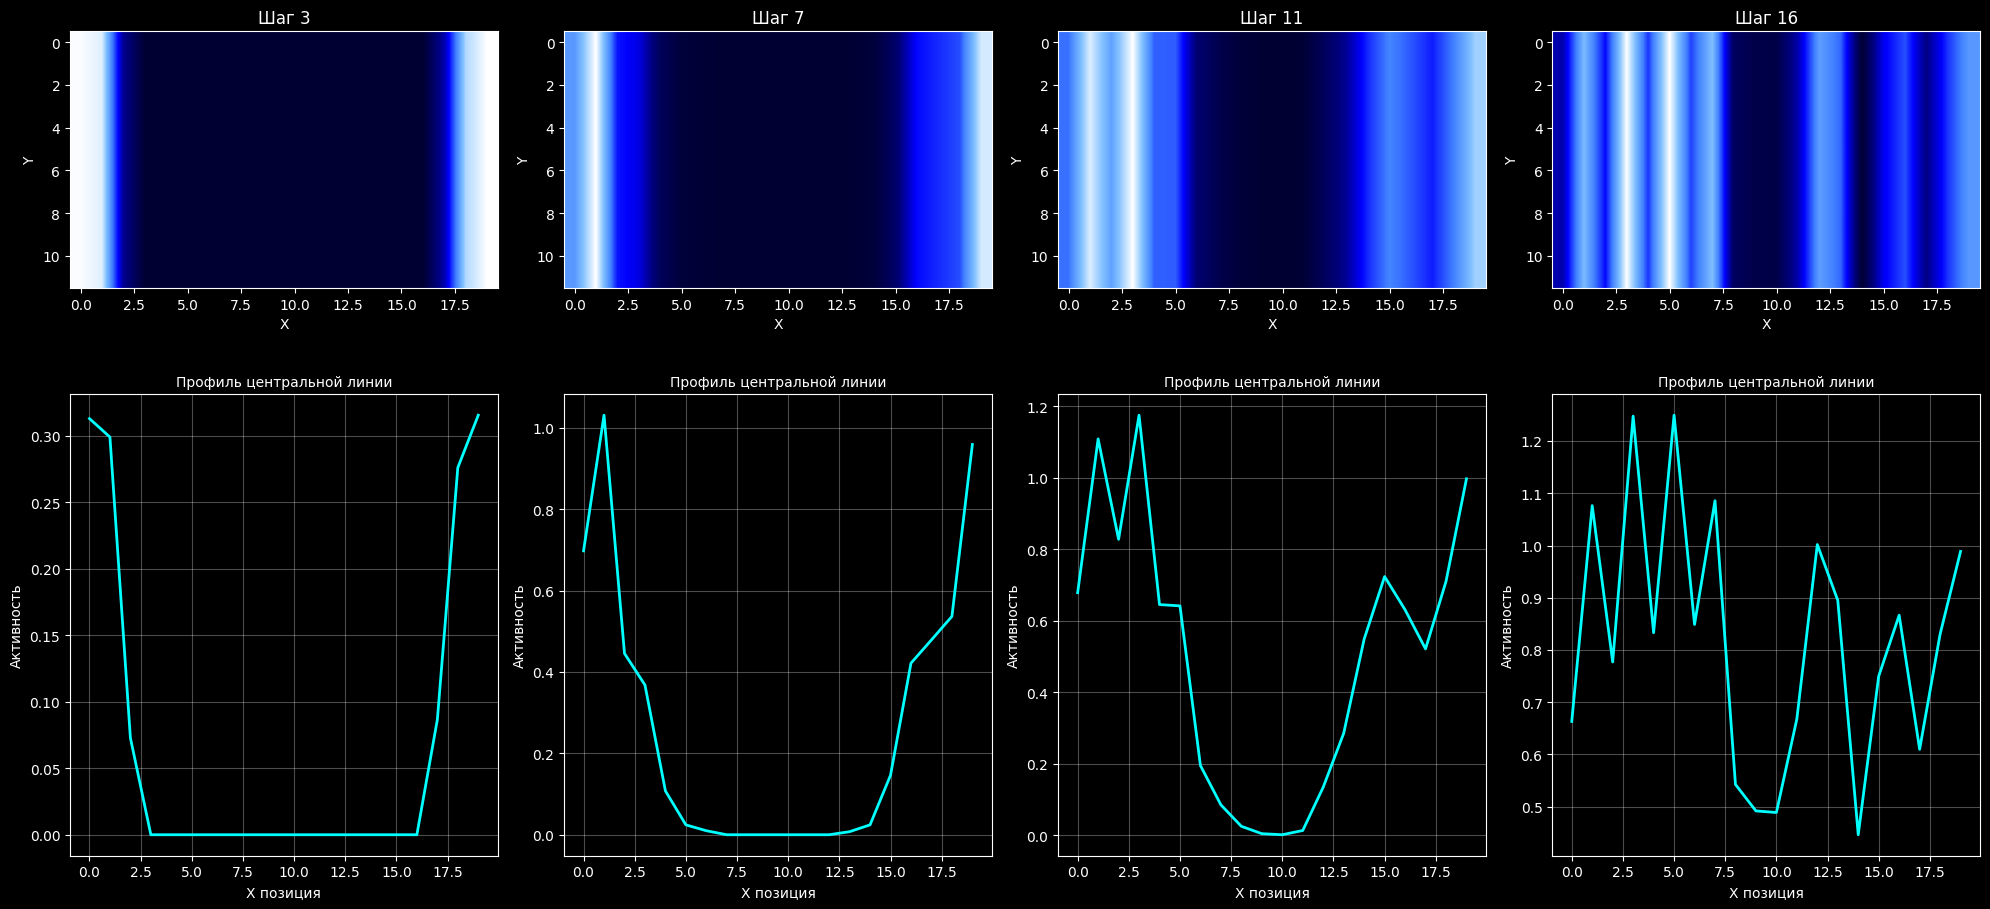

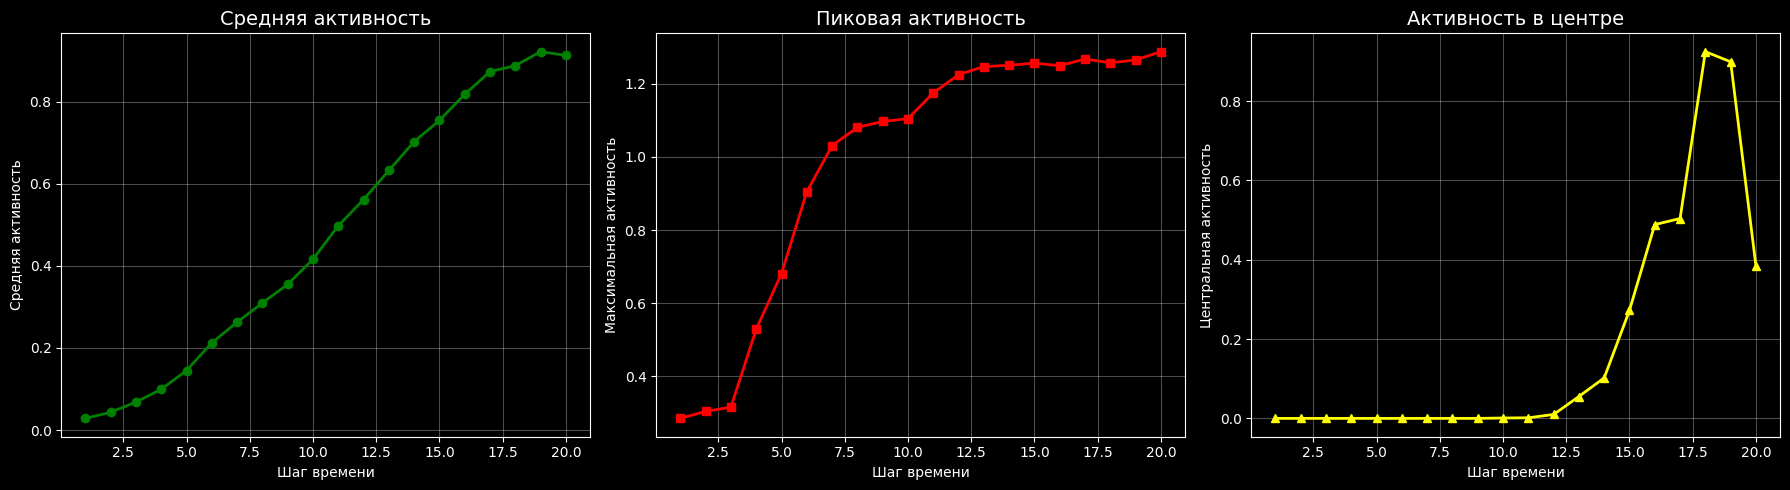

📊 Анализ интерференции:
   Максимальная средняя активность: 0.922
   Максимальная пиковая активность: 1.288
   Активность в центре (пик): 0.925
   Пик интерференции на шаге: 20


In [8]:
# Функция для демонстрации интерференции
def interference_demo(width=20, height=12, intensity1=1.5, intensity2=1.5, 
                     side1='left', side2='right', steps=20):
    """Демонстрация интерференции двух волн"""
    
    print(f"🌊 Интерференция: {side1} ({intensity1}) ↔ {side2} ({intensity2})")
    
    # Создаем решетку
    lattice = Simple2DLattice(width=width, height=height)
    
    # Создаем два источника волн
    wave1 = PatternGenerator.wave_source(width, height, side=side1, intensity=intensity1)
    wave2 = PatternGenerator.wave_source(width, height, side=side2, intensity=intensity2)
    
    # Цветовая схема
    colors = ['#000033', '#000080', '#0000FF', '#4080FF', '#80C0FF', '#FFFFFF']
    cmap = LinearSegmentedColormap.from_list('neural', colors)
    
    # Запускаем симуляцию
    activities = []
    avg_activities = []
    peak_activities = []
    
    for step in range(steps):
        if step < 6:  # Подаем волны первые 6 шагов
            combined_input = wave1 + wave2
            lattice.step(external_input=combined_input)
        else:
            lattice.step()
        
        activity = lattice.get_activity_map()
        activities.append(activity.copy())
        avg_activities.append(activity.mean())
        peak_activities.append(activity.max())
    
    # Создаем сравнительную визуализацию
    fig, axes = plt.subplots(2, 4, figsize=(20, 10))
    
    # Ключевые моменты интерференции
    key_moments = [2, 6, 10, 15]  # Начало, встреча, интерференция, затухание
    
    for i, step_idx in enumerate(key_moments):
        if step_idx < len(activities):
            # Верхний ряд - активность
            im1 = axes[0, i].imshow(activities[step_idx], cmap=cmap, interpolation='bilinear')
            axes[0, i].set_title(f'Шаг {step_idx + 1}', fontsize=12, color='white')
            axes[0, i].set_xlabel('X', color='white')
            axes[0, i].set_ylabel('Y', color='white')
            
            # Нижний ряд - профиль активности по центральной линии
            center_line = activities[step_idx][height//2, :]
            axes[1, i].plot(center_line, color='cyan', linewidth=2)
            axes[1, i].set_title(f'Профиль центральной линии', fontsize=10, color='white')
            axes[1, i].set_xlabel('X позиция', color='white')
            axes[1, i].set_ylabel('Активность', color='white')
            axes[1, i].grid(True, alpha=0.3)
            axes[1, i].tick_params(colors='white')
    
    plt.tight_layout()
    plt.show()
    
    # Анализ временной динамики
    fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(18, 5))
    
    # Средняя активность
    ax1.plot(range(1, len(avg_activities)+1), avg_activities, 'o-', color='green', linewidth=2)
    ax1.set_title('Средняя активность', fontsize=14, color='white')
    ax1.set_xlabel('Шаг времени', color='white')
    ax1.set_ylabel('Средняя активность', color='white')
    ax1.grid(True, alpha=0.3)
    ax1.tick_params(colors='white')
    
    # Пиковая активность
    ax2.plot(range(1, len(peak_activities)+1), peak_activities, 's-', color='red', linewidth=2)
    ax2.set_title('Пиковая активность', fontsize=14, color='white')
    ax2.set_xlabel('Шаг времени', color='white')
    ax2.set_ylabel('Максимальная активность', color='white')
    ax2.grid(True, alpha=0.3)
    ax2.tick_params(colors='white')
    
    # Активность в центре (точка встречи)
    center_activities = [act[height//2, width//2] for act in activities]
    ax3.plot(range(1, len(center_activities)+1), center_activities, '^-', color='yellow', linewidth=2)
    ax3.set_title('Активность в центре', fontsize=14, color='white')
    ax3.set_xlabel('Шаг времени', color='white') 
    ax3.set_ylabel('Центральная активность', color='white')
    ax3.grid(True, alpha=0.3)
    ax3.tick_params(colors='white')
    
    plt.tight_layout()
    plt.show()
    
    print(f"📊 Анализ интерференции:")
    print(f"   Максимальная средняя активность: {max(avg_activities):.3f}")
    print(f"   Максимальная пиковая активность: {max(peak_activities):.3f}")
    print(f"   Активность в центре (пик): {max(center_activities):.3f}")
    
    # Находим момент максимальной интерференции
    max_interference_step = peak_activities.index(max(peak_activities))
    print(f"   Пик интерференции на шаге: {max_interference_step + 1}")

# Запускаем демонстрацию
interference_demo()


In [9]:
# Интерактивный виджет для экспериментов с интерференцией
interact(interference_demo,
         width=widgets.IntSlider(value=20, min=12, max=30, step=2, description='Ширина:'),
         height=widgets.IntSlider(value=12, min=8, max=20, step=1, description='Высота:'),
         intensity1=widgets.FloatSlider(value=1.5, min=0.5, max=3.0, step=0.1, description='Интенсивность 1:'),
         intensity2=widgets.FloatSlider(value=1.5, min=0.5, max=3.0, step=0.1, description='Интенсивность 2:'),
         side1=widgets.Dropdown(options=['left', 'right', 'top', 'bottom'], value='left', description='Сторона 1:'),
         side2=widgets.Dropdown(options=['left', 'right', 'top', 'bottom'], value='right', description='Сторона 2:'),
         steps=widgets.IntSlider(value=20, min=12, max=30, step=2, description='Шаги:'))


interactive(children=(IntSlider(value=20, description='Ширина:', max=30, min=12, step=2), IntSlider(value=12, …

<function __main__.interference_demo(width=20, height=12, intensity1=1.5, intensity2=1.5, side1='left', side2='right', steps=20)>

In [ ]:
## 🎓 Выводы и Следующие Шаги

### 🧠 Что Мы Узнали

1. **Биологическая Аналогия Работает**: Простые одинаковые клетки могут создавать сложное поведение
2. **Распространение Сигналов**: Информация распространяется через решетку предсказуемым образом
3. **Интерференция Возможна**: Множественные сигналы взаимодействуют и создают новые паттерны
4. **Параметры Важны**: Изменение интенсивности и размеров сильно влияет на результат

### 🔬 Интересные Наблюдения

- **Волны затухают** со временем из-за нелинейности клеток
- **Интерференция создает** уникальные паттерны
- **Размер решетки** влияет на динамику распространения
- **Интенсивность** определяет дальность распространения

### 🚀 От 2D к 3D

Эта 2D демонстрация - упрощенная версия полной 3D системы:

- **В 3D**: каждая клетка имеет 6 соседей (не 4)
- **В 3D**: входы подаются на целую грань куба
- **В 3D**: выходы считываются с противоположной грани
- **В 3D**: гораздо больше возможностей для сложного поведения

### 🎯 Практическое Применение

**Эта концепция может быть использована для:**
- Обработки последовательностей (NLP)
- Распознавания образов
- Ассоциативной памяти
- Любых задач, требующих параллельной обработки


In [ ]:
# 🎉 Поздравляем! Вы изучили основы клеточной нейронной сети!

print("🎭 Simple 2D Demo - Завершение")
print("=" * 50)
print("🎯 Основные концепции изучены:")
print("   ✅ Единый прототип клетки")
print("   ✅ Синхронное обновление")
print("   ✅ Распространение сигналов")
print("   ✅ Интерференция волн")
print()
print("🚀 Готовность к изучению 3D версии:")
print("   📐 Понимание топологии")
print("   🧠 Понимание биологических аналогий")
print("   🎛️ Опыт экспериментов с параметрами")
print("   📊 Навыки анализа результатов")
print()
print("🎓 Следующие шаги:")
print("   1. Изучить модуль core/lattice_3d")
print("   2. Понять систему signal_propagation")
print("   3. Перейти к полной 3D архитектуре")
print("   4. Начать эксперименты с обучением")
print()
print("💡 Помните: сложность возникает из простоты!")
print("   Одинаковые клетки → Сложное поведение")

# Итоговая статистика
import torch
sample_lattice = Simple2DLattice(width=10, height=10)
sample_pattern = PatternGenerator.wave_source(10, 10, side='left')

print(f"\n📊 Технические детали:")
print(f"   Размер состояния клетки: {sample_lattice.cell_prototype.state_size}")
print(f"   Параметров в одной клетке: {sum(p.numel() for p in sample_lattice.cell_prototype.parameters())}")
print(f"   Общая эффективность: Один прототип для всех клеток!")

print("\n🎉 Спасибо за изучение Simple 2D Demo!")
print("📚 Теперь вы готовы к полной 3D архитектуре!")
